In [20]:
import tensorflow
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# data preprocessing
df = pd.read_csv("Tweets.csv")

In [22]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [23]:
new_df = df[['text', 'airline_sentiment']]

print(new_df.shape)
new_df.head()

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [24]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [25]:
new_df = new_df[new_df['airline_sentiment'] != 'neutral']

print(new_df.shape)
new_df.head()

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [26]:
new_df["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [27]:
sentiment_label = new_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [28]:
tweet = new_df.text.values

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(tweet)

In [30]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [31]:
#building classifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences (encoded_docs, maxlen = 200)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential()
vocab_size = len(tokenizer.word_index)
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           423456    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 440,107
Trainable params: 440,107
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
# training model
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
289/289 [==============================] - 51s 166ms/step - loss: 0.4013 - accuracy: 0.8333 - val_loss: 0.2065 - val_accuracy: 0.9212
Epoch 2/10
289/289 [==============================] - 46s 159ms/step - loss: 0.2194 - accuracy: 0.9166 - val_loss: 0.1617 - val_accuracy: 0.9411
Epoch 3/10
289/289 [==============================] - 46s 161ms/step - loss: 0.1649 - accuracy: 0.9375 - val_loss: 0.1626 - val_accuracy: 0.9450
Epoch 4/10
289/289 [==============================] - 47s 161ms/step - loss: 0.1341 - accuracy: 0.9513 - val_loss: 0.1674 - val_accuracy: 0.9394
Epoch 5/10
289/289 [==============================] - 47s 161ms/step - loss: 0.1138 - accuracy: 0.9592 - val_loss: 0.1810 - val_accuracy: 0.9402
Epoch 6/10
289/289 [==============================] - 46s 161ms/step - loss: 0.0935 - accuracy: 0.9656 - val_loss: 0.1942 - val_accuracy: 0.9411
Epoch 7/10
289/289 [==============================] - 46s 159ms/step - loss: 0.0871 - accuracy: 0.9690 - val_loss: 0.1965 - val_ac

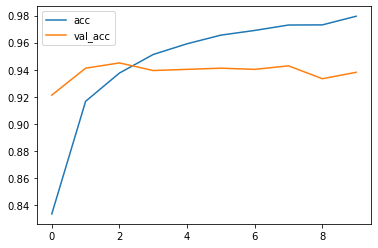

In [34]:
# plotting accuracy
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

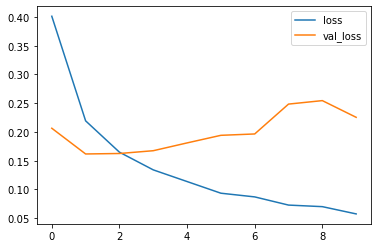

In [35]:
# plotting loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()